In [2]:
import music21 as m21
import Modules as m
import itertools
import functools
import numpy as np


#___________________________________________________________
def _ChordsinScore(score):
    return score.chordify().flat.getElementsByClass('Chord')

def _ChordsAsPitchesInScore(score):
    return [x.pitches for x in _ChordsinScore(score)]

def ChordsAsPitchNamesInScore(score):
    return [[x.nameWithOctave for x in c] for c in _ChordsAsPitchesInScore(score)]

#___________________________________________________________

def Indices(searchspace, list_of_checkingelements):
    return [x for x in range(len(searchspace)) if searchspace[x:x+len(list_of_checkingelements)] == list_of_checkingelements]

#___________________________________________________________
def _CombineChordList2(list1,list2):
    return list(list1)+[[]]+list(list2)

def CombineChordLists(list_of_chordlist):
    return functools.reduce(_CombineChordList2,list_of_chordlist)


In [3]:
test_scores = list(m21.corpus.chorales.Iterator(1,100))

In [4]:
test_scores_transposed = [m.ScoreAbstraction.TransposeToCIndividual(x) for x in test_scores]
test_Chordlist = CombineChordLists([ChordsAsPitchNamesInScore(x) for x in test_scores_transposed])

In [5]:
markov_result = m.Markov_v2.Markov_model(test_Chordlist,36)

In [6]:
generated_stream = m21.stream.Stream()
generated_stream.append([m21.chord.Chord(x) for x in markov_result])

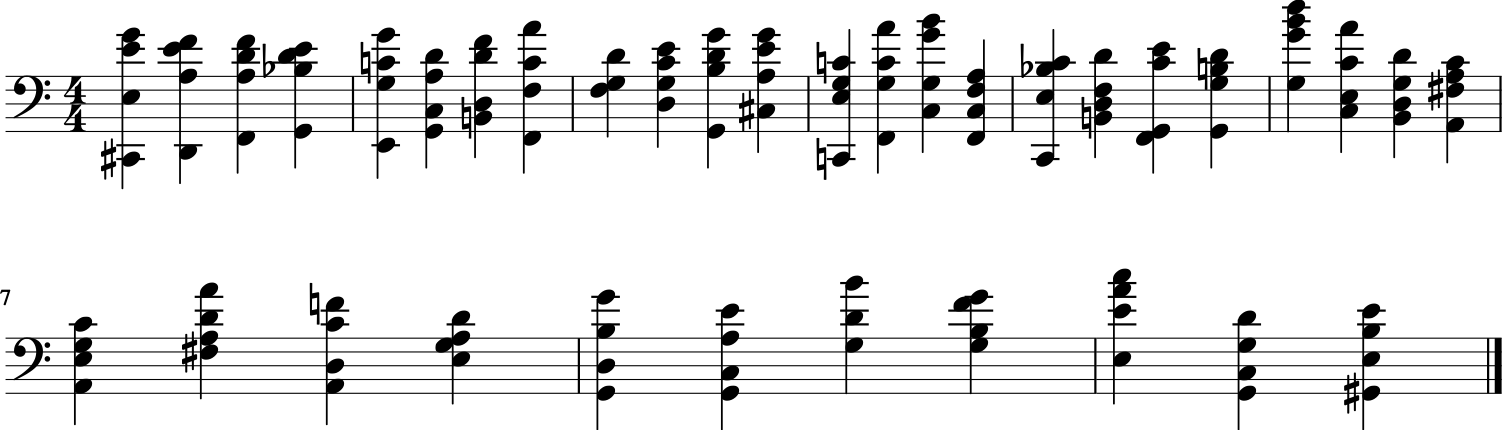

In [7]:
generated_stream.show()

In [8]:
generated_stream.show('midi')

ZeroDivisionError: float division by zero